In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
import networkx as nx
from ipdb import set_trace

# 权值演化

In [ ]:
for p in range(0,5000,1000):
    WeightAlls=torch.load('weights'+str(p)+'.pt')
    G=nx.Graph()
    node=[]
    for i in range(len(WeightAlls)-1):
        [Weight,High]=WeightAlls[i].shape
#         print(WeightAlls[i].shape)
        for j in range(Weight):
            node.append((torch.mean(WeightAlls[i][j,:]).tolist()+torch.mean(WeightAlls[i][:,j]).tolist())*1000)
    G.add_nodes_from(node)
#     set_trace()
    nx.draw_networkx_nodes(G, pos=nx.random_layout(G), nodelist=node, node_size=node)
    plt.show()

# 拓扑演化

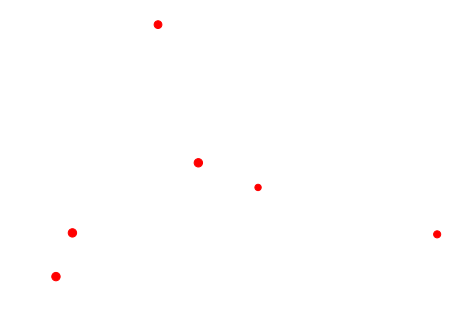

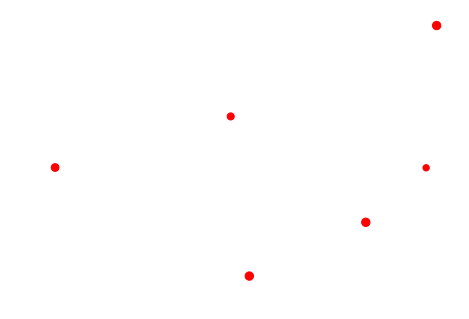

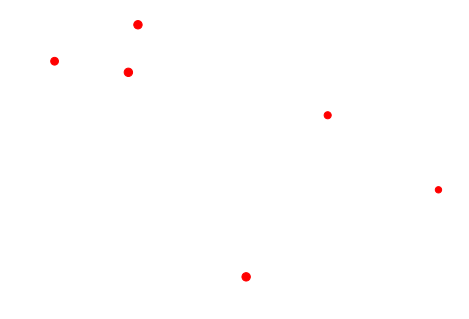

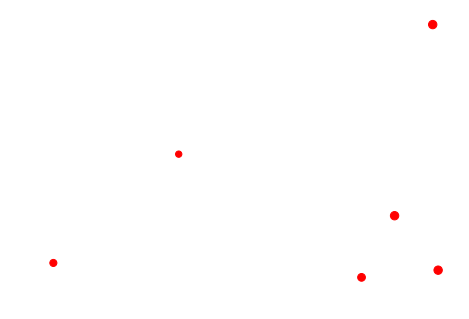

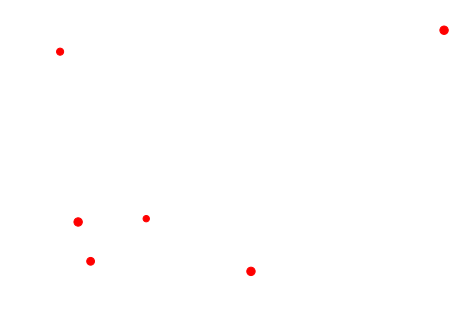

In [6]:
for p in range(0,5000,1000):
    WeightAlls=torch.load('weights'+str(p)+'.pt')
    G=nx.Graph()
    node=[]
    for i in range(len(WeightAlls)-1):
        [Weight,High]=WeightAlls[i].shape
#         print(WeightAlls[i].shape)
        for j in range(Weight):
            for k in range(High):
                if WeightAlls[i][j,k]>0.1:
                    G.add_edges_from([(j,k)])
#     set_trace()
    d = dict(G.degree)
    edges=list(G.edges())
    G.remove_edges_from(edges)
    nx.draw(G, nodelist=d.keys(), pos=nx.random_layout(G), node_size=[v*10  for v in d.values()])
    plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import RecurrencePlot

# Parameters
n_samples, n_timestamps = 100, 144

# Toy dataset
rng = np.random.RandomState(41)
X = rng.randn(n_samples, n_timestamps)

# Recurrence plot transformation
rp = RecurrencePlot(dimension=7, time_delay=3,
                    threshold='percentage_points',
                    percentage=30)
X_rp = rp.fit_transform(X)

# Show the results for the first time series
plt.figure(figsize=(6, 6))
plt.imshow(X_rp[0], cmap='binary', origin='lower')
plt.title('Recurrence Plot', fontsize=14)
plt.show()

<Figure size 600x600 with 1 Axes>

In [3]:
import numpy as np
from ipdb import set_trace

def rec_plot(s, eps=None, steps=None):
    if eps==None: eps=0.1
    if steps==None: steps=10
    N = s.size
#     set_trace()
    S = np.repeat(s[None,:], N, axis=0)
    Z = np.floor(np.abs(S-S.T)/eps)
    Z[Z>steps] = steps

    return Z


In [ ]:
import numpy as np
import pylab as plt
# from plot_recurrance import rec_plot

sig = np.random.uniform(size=100)
rec = rec_plot(sig)
plt.imshow(rec)
plt.show()